In [2]:
# Emre Yener
# Project 1
# 6/6/2019
# Cars Make/Model and License Plate States

In [3]:
#Initial Imports 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import requests
import json
import csv
import matplotlib.pyplot as plt
import time 
import datetime
import os

In [4]:
# Read CSV file

dataframe = pd.read_csv('parking-citations.csv')
random_sample_df=dataframe.sample(frac=0.005, replace=True,axis=0,random_state=1)
dataframe.head()

C:\Users\emrey\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
0,1103341116,2015-12-21T00:00:00,1251.0,NaN,NaN,CA,200304.0,NaN,HOND,PA,GY,13147 WELBY WAY,01521,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
1,1103700150,2015-12-21T00:00:00,1435.0,NaN,NaN,CA,201512.0,NaN,GMC,VN,WH,525 S MAIN ST,1C51,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
2,1104803000,2015-12-21T00:00:00,2055.0,NaN,NaN,CA,201503.0,NaN,NISS,PA,BK,200 WORLD WAY,2R2,2.0,8939,WHITE CURB,58.0,6439997.9,1802686.4
3,1104820732,2015-12-26T00:00:00,1515.0,NaN,NaN,CA,NaN,NaN,ACUR,PA,WH,100 WORLD WAY,2F11,2.0,000,17104h,NaN,6440041.1,1802686.2
4,1105461453,2015-09-15T00:00:00,115.0,NaN,NaN,CA,200316.0,NaN,CHEV,PA,BK,GEORGIA ST/OLYMPIC,1FB70,1.0,8069A,NO STOPPING/STANDING,93.0,99999.0,99999.0


In [5]:
#Finding percentages for the entire data so that I can compare it to my sample data to see if it is alright for me to use
#that sample

a = dataframe["Make"].dropna().unique().tolist()
unique_make_count4 = len(a)
#unique_make_count

a1 = dataframe.groupby("Make").count()
sum_of_values4 = a1['Ticket number'].sum()

#sorted_make = sorted(x, key= str.lower)

percentages4 = []

for z in range(unique_make_count4):
    percent = (a1['Ticket number'][z] / sum_of_values4)*100
    percentages4.append(percent)
    
#make and percentage dataframe => mpdf
mpdf_full = pd.DataFrame({'Make' : a , 'Percentages' : percentages4})
sorted_mpdf_full = mpdf_full.sort_values('Make', ascending = True)
reindex_full = sorted_mpdf_full.reset_index()
sorted_mpdf_reindex_full = reindex_full.drop('index', axis =1)
sorted_mpdf_reindex_full

,Make,Percentages
0,A4,0.000011
1,AAUD,0.000191
2,AAVH,0.000011
3,AB,0.000011
4,ABAR,0.000011
5,ABC,0.000011
6,ABRI,0.000021
7,ACC,0.000011
8,ACCR,0.001610
9,ACCU,0.000021


In [6]:
#Finding percentages for car models from my sample data and creating a new data frame to lay out the findings.

x = random_sample_df["Make"].dropna().unique().tolist()
unique_make_count = len(x)
#unique_make_count

x1 = random_sample_df.groupby("Make").count()
sum_of_values = x1['Ticket number'].sum()

#sorted_make = sorted(x, key= str.lower)

percentages = []

for z in range(unique_make_count):
    percent = (x1['Ticket number'][z] / sum_of_values)*100
    percentages.append(percent)
    
#make and percentage dataframe => mpdf
mpdf = pd.DataFrame({'Make' : x , 'Percentages' : percentages})
sorted_mpdf = mpdf.sort_values('Make', ascending = True)
reindex = sorted_mpdf.reset_index()
sorted_mpdf_reindex_sample = reindex.drop('index', axis =1)
sorted_mpdf_reindex_sample

,Make,Percentages
0,ACUR,8.739325
1,ALFA,0.101719
2,ARIS,0.002119
3,ASTO,0.033906
4,AUBU,0.012715
5,AUDI,1.210028
6,AUHE,0.074170
7,BENT,0.008477
8,BENZ,0.002119
9,BMW,0.002119


In [7]:
#T-test conducted to see if I can use my sample data for car models created initially. I have not done RegEx and kept the 
#original versions of both the sample and the actual data. This way I ensured that the T-test will yield a better result
#since both the sample and the actual data have mistakes in them.

import scipy.stats as stats

stats.ttest_1samp(sorted_mpdf_reindex_sample['Percentages'], sorted_mpdf_reindex_full['Percentages'].mean())

#The p value is significantly lower than 0.05 which means the sample is quite significant and I can use this data freely.

Ttest_1sampResult(statistic=3.73603756267519, pvalue=0.00026395387311093575)

In [8]:
#Regular Expression tries. I found the values which start with a 'V' to see if there are any car model names that are 
#similar to each other. This signifies that there are wrong entries and they should be merged. Having seen that this does
#not yield actual locations of the values, it does not do too much help.

import re
for element in x :
    q = re.match(("V\w+"), element)
    if q:
        print(q)


<re.Match object; span=(0, 4), match='VOLV'>
<re.Match object; span=(0, 4), match='VOLK'>
<re.Match object; span=(0, 2), match='VW'>
<re.Match object; span=(0, 4), match='VESP'>


In [9]:
#Regular Expression tries. I found the values which start with a 'ME' to see if there are any car model names that are 
#similar to each other. This signifies that there are wrong entries and they should be merged. Having seen that this does
#not yield actual locations of the values, it does not do too much help.
 
for element in x:
    q = re.match(("ME\w+"), element)
    if q:
        print(q)

<re.Match object; span=(0, 4), match='MERZ'>
<re.Match object; span=(0, 4), match='MERC'>
<re.Match object; span=(0, 4), match='MERK'>
<re.Match object; span=(0, 3), match='MER'>


In [10]:
#This is done for my own sake to have the greatest percentages visible to my eye at all times.

sorted_mpdf_reindex_sample.sort_values(by = 'Percentages', ascending = False)

,Make,Percentages
31,FMCS,16.525038
30,FIAT,11.295005
0,ACUR,8.739325
132,SUZU,7.010108
145,VOLK,6.940177
139,TOYT,4.721439
23,DAEW,4.009409
22,CUSH,3.522007
60,INTL,3.030367
88,MAZD,2.966793


In [11]:
#This is the phase where I located the values that need to be added together and added them together to create a better
#looking data frame

ph = sorted_mpdf_reindex_sample['Percentages']

new_vw = ph[145]+ph[147]
new_mb = ph[8] + ph[89] + ph[91]+ph[90]+ph[92]+ph[93]
new_toyo = ph[138]+ph[139]
new_mini = ph[94] + ph[95] + ph[97]+ph[121]+ph[122]
new_land = ph[84]+ph[85]+ph[76]
new_lex = ph[80]+ph[81]+ph[79]
new_hyun = ph[51]+ph[53]
new_chev = ph[14]+ph[15]+ph[16]
new_hummer = ph[48] + ph[49]

#sorted_mpdf_reindex.drop(sorted_mpdf_reindex.index[[145,8,89,91,90,92,138,94,95,97,121,84,76,79,80,81,51,14,15]])

In [12]:
#This is where the data frame is cleaned from duplicates and the new totals are reassigned to the respective cells.

mpdf_final = sorted_mpdf_reindex_sample.copy()
mpdf_final.set_value(147,'Percentages',new_vw)
mpdf_final.set_value(93,'Percentages',new_mb)
mpdf_final.set_value(139,'Percentages',new_toyo)
mpdf_final.set_value(122,'Percentages',new_mini)
mpdf_final.set_value(85,'Percentages',new_land)
mpdf_final.set_value(81,'Percentages',new_lex)
mpdf_final.set_value(53,'Percentages',new_hyun)
mpdf_final.set_value(16,'Percentages',new_chev)
mpdf_final.set_value(49,'Percentages',new_hummer)
mpdf_final.drop([145,8,89,90,91,92,138,94,95,97,121,76,84,79,80,51,14,15,48], inplace=True)
mpdf_final.index = range(134)
mpdf_final

C:\Users\emrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
C:\Users\emrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
C:\Users\emrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\emrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\emrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] o

,Make,Percentages
0,ACUR,8.739325
1,ALFA,0.101719
2,ARIS,0.002119
3,ASTO,0.033906
4,AUBU,0.012715
5,AUDI,1.210028
6,AUHE,0.074170
7,BENT,0.008477
8,BMW,0.002119
9,BOUN,0.002119


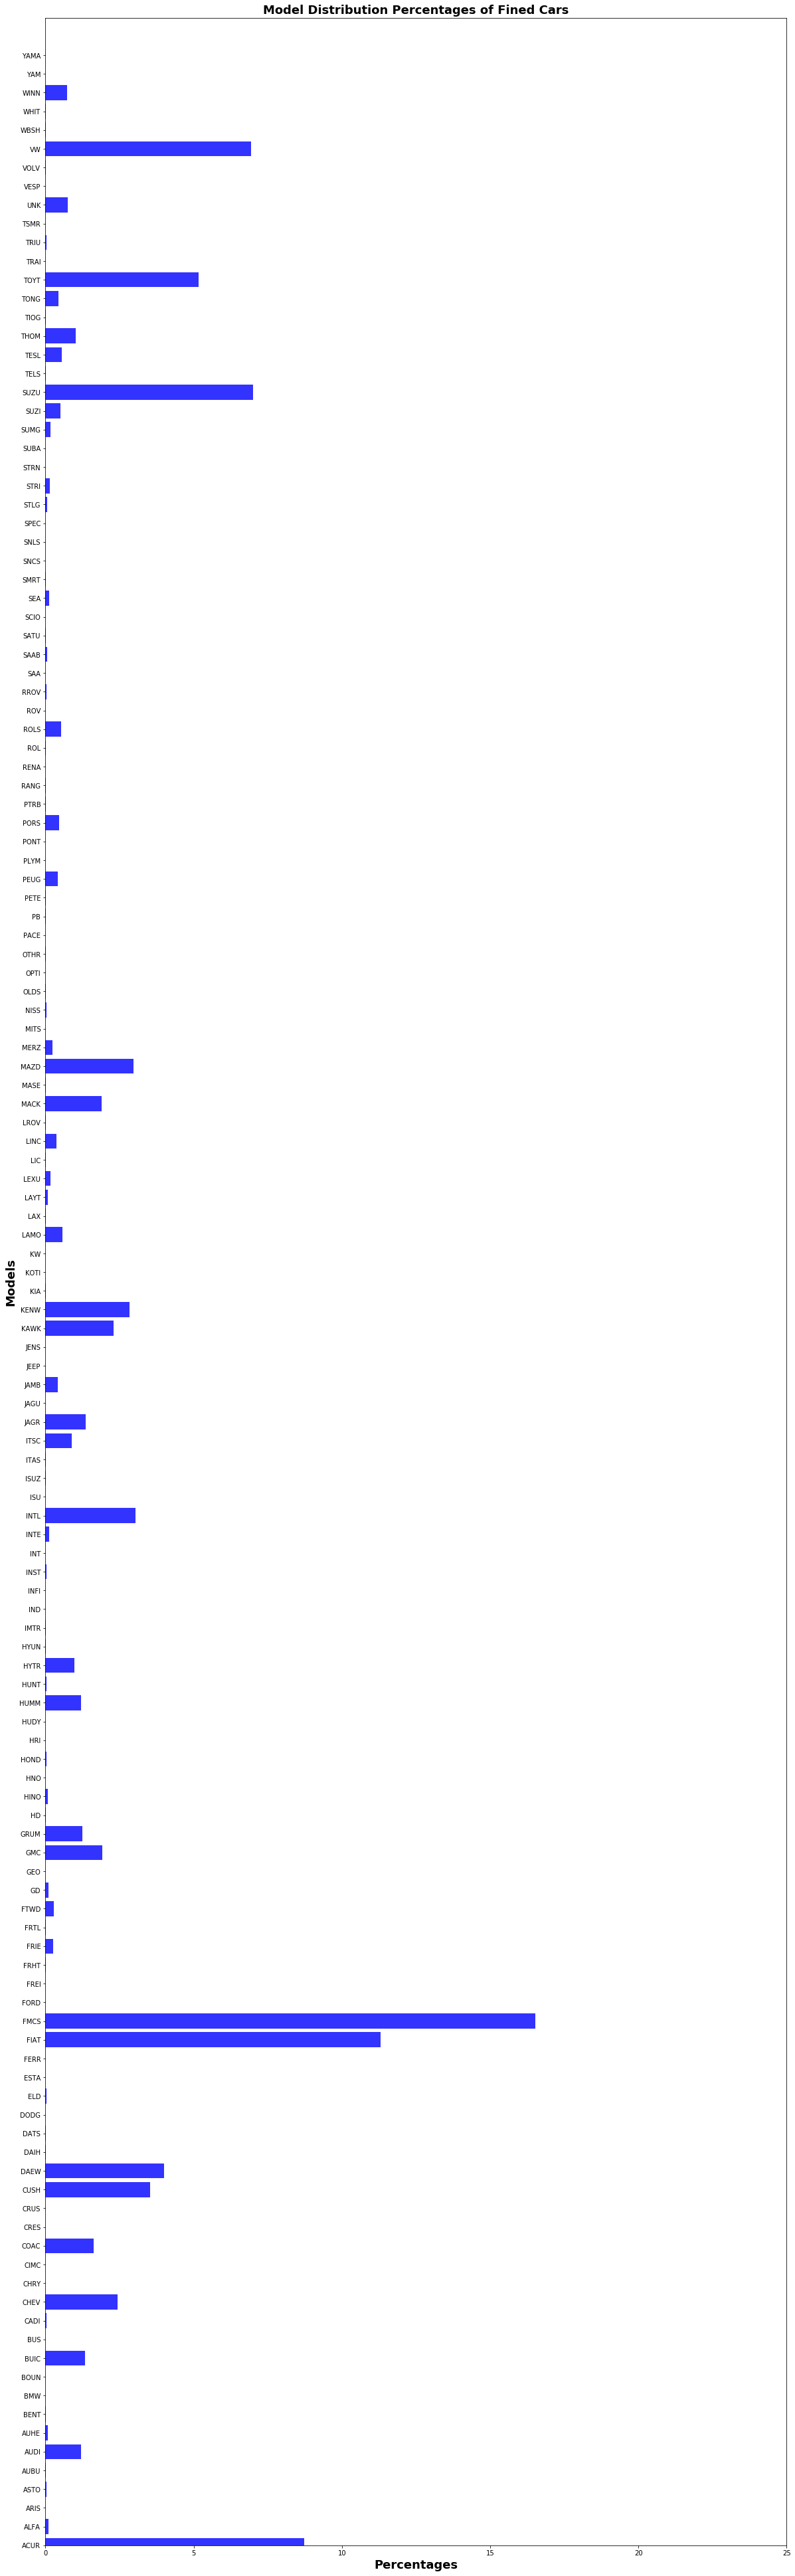

In [13]:
#Bar chart to show the distribution of car models across the sample data.

percentages_of_models = mpdf_final.Percentages
x_axis1 = np.arange(len(percentages_of_models))
plt.barh(x_axis1,percentages_of_models, color='b', alpha=0.8, align="center")
tick_locations1 = [value for value in x_axis1]
sikko = mpdf_final.Make.tolist()
plt.yticks(tick_locations1, sikko)
plt.ylim(0, len(percentages_of_models)+1)
plt.xlim(0,25)

plt.title("Model Distribution Percentages of Fined Cars", fontsize=18, weight='bold')
plt.ylabel("Models", fontsize=18, weight='bold')
plt.xlabel("Percentages", fontsize = 18, weight = 'bold')

fig = plt.gcf()
fig.set_size_inches(20,70)

plt.savefig("C:/Users/emrey/Desktop/WashUBootCamp/GitPull/WUSTL201904DATA2/LAParkingCitations/Emre_Models Bar Chart.png")
plt.show()

In [14]:
#This is a blank cell to leave a space between car model analysis (above) and license plates states analysis (below).

In [15]:
#T-test conducted to see if I can use my sample data for license plate states created initially.
#The following initial T-test has been done : stats.ttest_1samp(pldf['Percentages'], pldf_full['Percentages'].mean())
#Unfortunately, the p value was about 0.7. This encouraged me to try another random sample and do everything again. 
#Below is how I get a new sample. I will initiate the T-test after the calculations. I will comment out the code below.

#random_sample_df2=dataframe.sample(frac=0.05,replace=True,axis=0,random_state=4)

In [16]:
#This is to have the same calculations run thorught the entire data frame instead of just the sample. This is again
#done to ensure a T-test can run.

d = dataframe["RP State Plate"].dropna().unique().tolist()
unique_make_count5 = len(d)
#unique_make_count2

d1 = dataframe.groupby("RP State Plate").count() #sum of values will include not available numbers when df grows, be careful
sum_of_values5 = d1['Ticket number'].sum()
sorted_state5 = d1.reset_index()

percentages5 = []

for k in range(unique_make_count5):
    percent5 = (d1['Ticket number'][k] / sum_of_values5)*100
    percentages5.append(percent5)
    
#plates dataframe = pldf
pldf_full = pd.DataFrame({'State' : sorted_state5['RP State Plate'] , 'Percentages' : percentages5})
pldf_full

,State,Percentages
0,AB,0.019148
1,AK,0.013157
2,AL,0.041174
3,AR,0.033977
4,AS,0.000180
5,AZ,0.891633
6,BC,0.031034
7,CA,93.153274
8,CN,0.001926
9,CO,0.254625


In [20]:
#Grouped the states from license plates to see the distribution of states. The question is to see if there is an unusual 
#amount of a state other than California to see if there are any irregularities.

y = random_sample_df["RP State Plate"].dropna().unique().tolist()
unique_make_count2 = len(y)
#unique_make_count2

y1 = random_sample_df.groupby("RP State Plate").count() #sum of values will include not available numbers when df grows, be careful
sum_of_values2 = y1['Ticket number'].sum()
sorted_state = y1.reset_index()

percentages2 = []

for k in range(unique_make_count2):
    percent2 = (y1['Ticket number'][k] / sum_of_values2)*100
    percentages2.append(percent2)
    
#plates dataframe = pldf
pldf = pd.DataFrame({'State' : sorted_state['RP State Plate'] , 'Percentages' : percentages2})
pldf.drop([0,65,11,14,47,43,25,34,33,32,59,50,56,5,7], inplace = True)
pldf_reindex = pldf.reset_index().drop('index', axis=1)
pldf_reindex

#About 94% of the cars are from California. Considering we are analyzing Los Angeles data, this makes sense.

,State,Percentages
0,AK,0.012701
1,AL,0.038104
2,AR,0.033870
3,AZ,0.853109
4,CA,93.361417
5,CO,0.228625
6,CT,0.055039
7,DC,0.027520
8,DE,0.019052
9,FL,0.444548


In [21]:
#T-test conducted to see if I can use my sample data created initially.
#I have looked at different samples with different random states and fractions. No matter the fraction, the p value is 
#always higher than 0.05 and that tells us the sample data is not significant unfortunately. This conclusion leads me to
#use the first original sample data I have gathered.

stats.ttest_1samp(pldf['Percentages'], pldf_full['Percentages'].mean())

Ttest_1sampResult(statistic=0.36858586591984144, pvalue=0.7139925204057403)

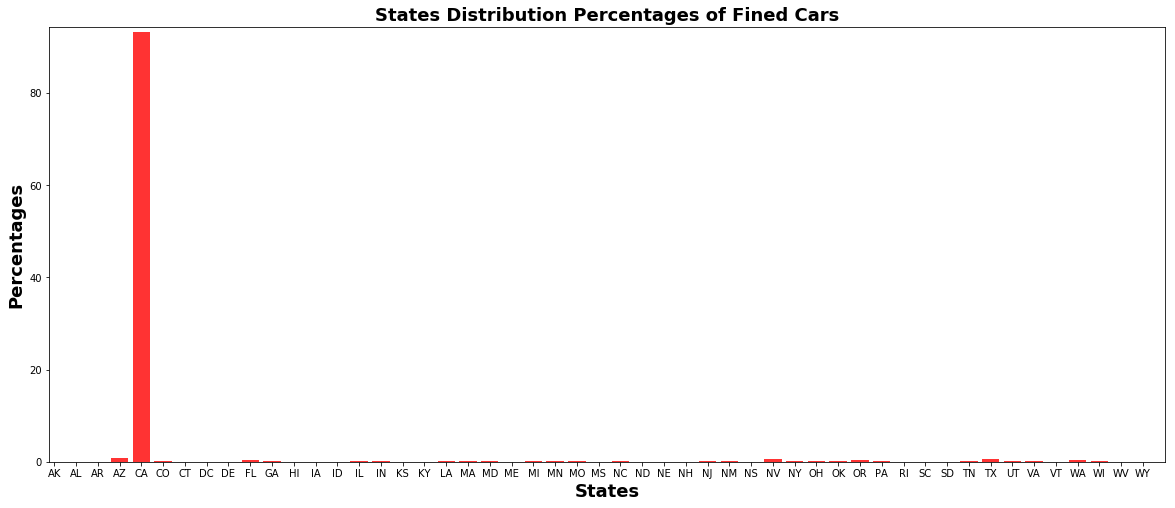

In [22]:
#Bar chart for the license plate states distribution

percentages_of_states = pldf_reindex.Percentages
x_axis = np.arange(len(percentages_of_states))
plt.bar(x_axis, percentages_of_states, color='r', alpha=0.8, align="center")
tick_locations = [value for value in x_axis]
yarrak = pldf_reindex.State.tolist()
plt.xticks(tick_locations, yarrak)
plt.ylim(0, max(percentages_of_states)+1)
plt.xlim(-0.25,len(x_axis))

plt.title("States Distribution Percentages of Fined Cars", fontsize=18, weight='bold')
plt.xlabel("States", fontsize=18, weight='bold')
plt.ylabel("Percentages", fontsize=18, weight='bold')

fig = plt.gcf()
fig.set_size_inches(20, 8)

plt.savefig("C:/Users/emrey/Desktop/WashUBootCamp/GitPull/WUSTL201904DATA2/LAParkingCitations/Emre_State Bar Chart.png")
plt.show()